In [1]:
import pandas as pd
import numpy as np
from scipy import signal

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings            
warnings.filterwarnings("ignore")

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,  classification_report

In [4]:
path = r'C:\Users\User\Stress-Predict-Dataset-main\Raw_data'

In [5]:
# Iterate over every one of the participating directories in the file.
for folder in os.listdir(path):
    if folder.startswith('S'):
        folder_path = os.path.join(path, folder)
        
        AccSet = pd.read_csv(os.path.join(folder_path, 'ACC.csv'), header=0)
        BvpSet = pd.read_csv(os.path.join(folder_path, 'BVP.csv'), header=0)
        EdaSet= pd.read_csv(os.path.join(folder_path, 'EDA.csv'), header=0)
        HrSet = pd.read_csv(os.path.join(folder_path, 'HR.csv'), header=0)
        IbiSet = pd.read_csv(os.path.join(folder_path, 'IBI.csv'), header=0)
        TempSet = pd.read_csv(os.path.join(folder_path, 'TEMP.csv'), header=0)
        TagsSet = pd.read_csv(os.path.join(folder_path, f'tags_{folder}.csv'), header=None)
        
        # Removal of 2 rows from top
        acc_header = AccSet.iloc[:2]
        bvp_header = BvpSet.iloc[:2]
        eda_header = EdaSet.iloc[:2]
        hr_header = HrSet.iloc[:2]
        ibi_header = IbiSet.iloc[:2]
        temp_header = TempSet.iloc[:2]
        
        # Removal of null values
        AccSet =AccSet.dropna()
        BvpSet=AccSet.dropna()
        EdaSet=EdaSet.dropna()
        HrSet=HrSet.dropna()
        IbiSet=IbiSet.dropna()
        TempSet=TempSet.dropna()
        
        # Resampling dataset utilizing interpolation
        acc_df = pd.DataFrame(np.interp(np.linspace(0, 
                                                    len(AccSet)-1, int(len(AccSet)/2 * 4)), np.arange(len(AccSet)), 
                                        AccSet.values[:,0]))
        bvp_df = pd.DataFrame(np.interp(np.linspace(0, len(BvpSet)-1,
                                                    int(len(BvpSet)/((float(bvp_header.iloc[1,0])+1) * 4))), 
                                        np.arange(len(BvpSet)), BvpSet.values[:,0]))
        eda_df = pd.DataFrame(np.interp(np.linspace(0, len(EdaSet)-1,
                                                    int(len(EdaSet)/((float(eda_header.iloc[1,0])+1) * 4))),
                                        np.arange(len(EdaSet)), EdaSet.values[:,0]))
        hr_df = pd.DataFrame(np.interp(np.linspace(0, len(HrSet)-1,
                                                   int(len(HrSet)/(float(hr_header.iloc[1,0]) * 4))), 
                                       np.arange(len(HrSet)), HrSet.values[:,0]))
        ibi_df = pd.DataFrame(np.interp(np.linspace(0, len(IbiSet)-1, int(len(IbiSet)/2 * 4)),
                                        np.arange(len(IbiSet)), IbiSet.values[:,0]))
        temp_df = pd.DataFrame(np.interp(np.linspace(0, len(TempSet)-1,
                                                     int(len(TempSet)/(float(temp_header.iloc[1,0]) * 4))), 
                                         np.arange(len(TempSet)), TempSet.values[:,0]))

In [6]:
acc_header

,1646838724.000000,1646838724.000000,1646838724.000000.1
0,32.0,32.0,32.0
1,-11.0,45.0,56.0


In [7]:
acc_df['Stress'] = None
bvp_df['Stress'] = None
eda_df['Stress'] = None
hr_df['Stress'] = None
ibi_df['Stress'] = None
temp_df['Stress'] = None

In [8]:
hr_df 

,0,Stress
0,1.000000,None
1,72.601429,None
2,72.022857,None
3,74.384286,None
4,87.757143,None
5,72.741429,None
6,97.321429,None
7,65.500000,None


In [9]:
ibi_df.shape

(2220, 2)

In [10]:
ibi_df

,0,Stress
0,48.062500,None
1,48.437331,None
2,48.812162,None
3,49.202597,None
4,49.593046,None
...,...,...
2215,3307.330618,None
2216,3326.040932,None
2217,3344.734833,None
2218,3345.242416,None


In [11]:
acc_df

,0,Stress
0,32.000000,None
1,10.500095,None
2,-10.999809,None
3,-8.500033,None
4,-6.000044,None
...,...,...
225465,-16.999991,None
225466,-16.499993,None
225467,-16.000004,None
225468,-16.500002,None


In [12]:
bvp_df

,0,Stress
0,32.000000,None
1,-48.004045,None
2,-39.001277,None
3,-27.001277,None
4,-49.993187,None
...,...,...
28178,-16.000852,None
28179,-15.000639,None
28180,-17.000000,None
28181,-16.999787,None


In [13]:
StressData = pd.DataFrame({"ACC":acc_df[0],"TEMP":temp_df[0],
                            "EDA":eda_df[0], "IBI":ibi_df[0],
                           "BVP":bvp_df[0],"HR":hr_df[0] })

In [14]:
StressData.head(10)

,ACC,TEMP,EDA,IBI,BVP,HR
0,32.000000,4.00,4.000000,48.062500,32.000000,1.000000
1,10.500095,33.49,0.808482,48.437331,-48.004045,72.601429
2,-10.999809,33.53,0.549949,48.812162,-39.001277,72.022857
3,-8.500033,33.57,0.534621,49.202597,-27.001277,74.384286
4,-6.000044,33.55,0.552515,49.593046,-49.993187,87.757143
5,-22.499634,33.49,0.544840,49.983495,-44.995742,72.741429
6,-38.999561,33.55,0.530712,50.373944,-34.005110,97.321429
7,-43.499860,33.55,0.534572,55.787559,-45.017884,65.500000
8,-47.999840,33.50,0.538368,61.214800,-52.986374,NaN
9,-57.499621,33.41,0.517925,61.623416,-43.005748,NaN


In [15]:
StressData.shape

(225470, 6)

In [16]:
StressData.head()

,ACC,TEMP,EDA,IBI,BVP,HR
0,32.000000,4.00,4.000000,48.062500,32.000000,1.000000
1,10.500095,33.49,0.808482,48.437331,-48.004045,72.601429
2,-10.999809,33.53,0.549949,48.812162,-39.001277,72.022857
3,-8.500033,33.57,0.534621,49.202597,-27.001277,74.384286
4,-6.000044,33.55,0.552515,49.593046,-49.993187,87.757143


In [17]:
StressData.isnull().sum()

ACC          0
TEMP    225366
EDA     221945
IBI     223250
BVP     197287
HR      225462
dtype: int64

In [18]:
StressData['BVP'].fillna(StressData['BVP'].mean(), inplace=True)

In [19]:
StressData['TEMP'].fillna(StressData['TEMP'].mean(), inplace=True)

In [20]:
StressData['EDA'].fillna(StressData['EDA'].mean(), inplace=True)

In [21]:
StressData['IBI'].fillna(StressData['IBI'].mean(), inplace=True)

In [22]:
StressData['HR'].fillna(StressData['HR'].mean(), inplace=True)

In [23]:
StressData.columns

Index(['ACC', 'TEMP', 'EDA', 'IBI', 'BVP', 'HR'], dtype='object')

In [24]:
StressData['add']=StressData['ACC']+StressData['TEMP']+StressData['EDA']+StressData['BVP']+StressData['HR']+StressData['IBI']

In [25]:
StressData.head()

,ACC,TEMP,EDA,IBI,BVP,HR,add
0,32.000000,4.00,4.000000,48.062500,32.000000,1.000000,121.062500
1,10.500095,33.49,0.808482,48.437331,-48.004045,72.601429,117.833291
2,-10.999809,33.53,0.549949,48.812162,-39.001277,72.022857,104.913882
3,-8.500033,33.57,0.534621,49.202597,-27.001277,74.384286,122.190193
4,-6.000044,33.55,0.552515,49.593046,-49.993187,87.757143,115.459472


In [26]:
max_value = StressData['add'].max()

In [27]:
StressData['Stress'] = StressData['add'].apply(lambda x: 'hyperventilation' if x >= 0.66*max_value else ('interview' if x >= 0.33*max_value else 'stroop'))

In [28]:
StressData['Stress'].value_counts()

interview           223966
stroop                 935
hyperventilation       569
Name: Stress, dtype: int64

In [29]:
StressData.isnull().sum()

ACC       0
TEMP      0
EDA       0
IBI       0
BVP       0
HR        0
add       0
Stress    0
dtype: int64

In [30]:
StressData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225470 entries, 0 to 225469
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ACC     225470 non-null  float64
 1   TEMP    225470 non-null  float64
 2   EDA     225470 non-null  float64
 3   IBI     225470 non-null  float64
 4   BVP     225470 non-null  float64
 5   HR      225470 non-null  float64
 6   add     225470 non-null  float64
 7   Stress  225470 non-null  object 
dtypes: float64(7), object(1)
memory usage: 13.8+ MB


In [31]:
StressData.shape

(225470, 8)

In [32]:
StressData.columns

Index(['ACC', 'TEMP', 'EDA', 'IBI', 'BVP', 'HR', 'add', 'Stress'], dtype='object')

# Exploratory Data Analysis

In [33]:
StressData.describe().T

,count,mean,std,min,25%,50%,75%,max
ACC,225470.0,-37.879946,20.974558,-128.000000,-56.935600,-39.000000,-27.000000,115.568961
TEMP,225470.0,32.170741,0.060699,4.000000,32.170741,32.170741,32.170741,33.570000
EDA,225470.0,0.716152,0.049072,0.147681,0.716152,0.716152,0.716152,4.000000
IBI,225470.0,1375.392604,84.010489,48.062500,1375.392604,1375.392604,1375.392604,3345.750000
BVP,225470.0,-37.856863,7.424852,-113.780924,-37.856863,-37.856863,-37.856863,109.716415
HR,225470.0,67.916071,0.161021,1.000000,67.916071,67.916071,67.916071,97.321429
add,225470.0,1400.458759,87.345124,39.888220,1379.908434,1400.988805,1411.960656,3343.754040


In [34]:
StressData['Stress'].value_counts()

interview           223966
stroop                 935
hyperventilation       569
Name: Stress, dtype: int64

In [35]:
StressData['Stress'].unique()

array(['stroop', 'interview', 'hyperventilation'], dtype=object)

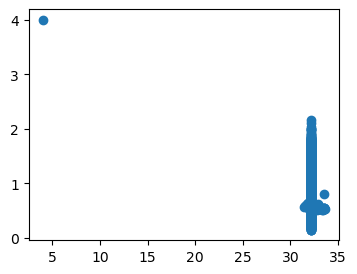

In [36]:
plt.figure(figsize = (4,3))
plt.scatter(StressData["TEMP"].to_numpy(), StressData["EDA"].to_numpy())
plt.show()

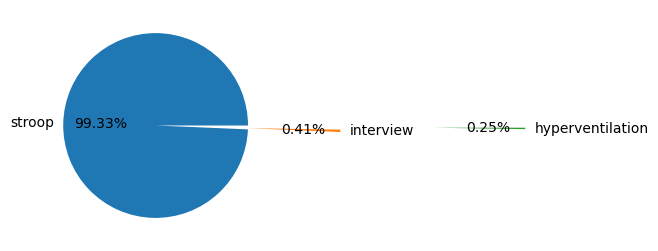

In [37]:
plt.figure(figsize = (5,3))
plt.pie(StressData['Stress'].value_counts(), labels=StressData['Stress'].unique(),  autopct='%.2f%%',
       explode = (0, 1, 3))
plt.show()

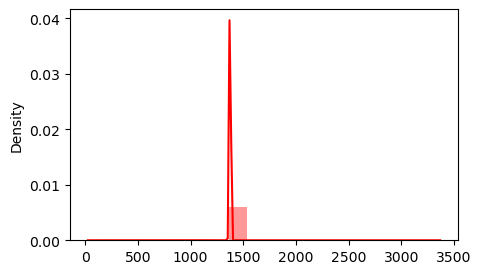

In [38]:
plt.figure(figsize = (5,3))
sns.distplot(x=StressData['IBI'],  kde=True, bins=20, color='#ff0000')
plt.show()

<Axes: >

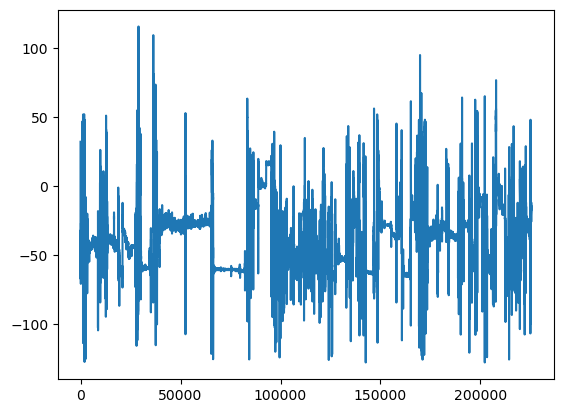

In [39]:
StressData['ACC'].plot()

In [40]:
labenc = LabelEncoder()

In [41]:
StressData['Stress']= labenc.fit_transform(StressData['Stress'])

In [42]:
StressData['Stress'].value_counts()

1    223966
2       935
0       569
Name: Stress, dtype: int64

In [43]:
StressData.drop(['add'], axis=1,inplace=True)

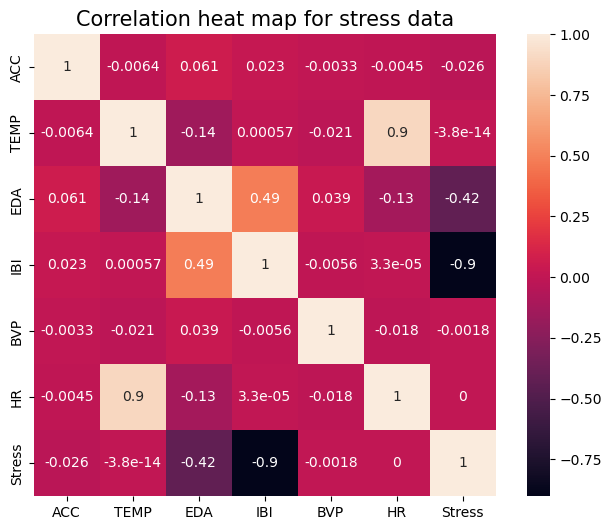

In [44]:
plt.figure(figsize = (8,6))
correlmatrix = StressData.corr()
sns.heatmap(correlmatrix, annot=True,square = True)
plt.title('Correlation heat map for stress data', fontsize = 15)
plt.show()

In [45]:
correlmatrix['Stress']

ACC      -2.558670e-02
TEMP     -3.799110e-14
EDA      -4.237313e-01
IBI      -9.025020e-01
BVP      -1.775832e-03
HR        0.000000e+00
Stress    1.000000e+00
Name: Stress, dtype: float64

# Dataset splitting

In [46]:
X = StressData.drop(['Stress'], axis=1)

In [47]:
y =StressData['Stress']

In [48]:
X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,test_size = 0.20, random_state=117)

# Machine learning model

## Random Forest Classifier

In [49]:
rfc = RandomForestClassifier()
rfc.fit(X_Train,y_Train)

RandomForestClassifier()

In [50]:
cross_val_score(rfc, X_Train,y_Train, cv=2)

array([0.99993347, 0.99995565])

In [51]:
rfc_pred = rfc.predict(X_Test)

In [52]:
rfc_accuracy = round(accuracy_score(y_Test, rfc_pred)*100, 2)

In [53]:
rfc_accuracy

100.0

In [54]:
print(classification_report(y_Test, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      1.00      1.00     44812
           2       1.00      0.99      1.00       189

    accuracy                           1.00     45094
   macro avg       1.00      1.00      1.00     45094
weighted avg       1.00      1.00      1.00     45094



In [55]:
print(confusion_matrix(y_Test, rfc_pred))

[[   93     0     0]
 [    0 44812     0]
 [    0     1   188]]


## Logistic Regression

In [56]:
lm_log=LogisticRegression()

In [57]:
lm_log.fit(X_Train,y_Train)

LogisticRegression()

In [58]:
cross_val_score(lm_log, X_Train,y_Train, cv=2)

array([0.99984477, 0.99995565])

In [59]:
lm_log_pred = lm_log.predict(X_Test)

In [60]:
lm_log_accuracy = round(accuracy_score(y_Test, lm_log_pred)*100, 2)

In [61]:
lm_log_accuracy

100.0

In [62]:
print(classification_report(y_Test, lm_log_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      1.00      1.00     44812
           2       1.00      0.99      1.00       189

    accuracy                           1.00     45094
   macro avg       1.00      1.00      1.00     45094
weighted avg       1.00      1.00      1.00     45094



In [63]:
print(confusion_matrix(y_Test, lm_log_pred))

[[   93     0     0]
 [    0 44812     0]
 [    0     1   188]]


## Naive Bayes

In [64]:
MNB=GaussianNB()

In [65]:
MNB.fit(X_Train,y_Train)

GaussianNB()

In [66]:
cross_val_score(MNB, X_Train,y_Train, cv=2)

array([0.99204994, 0.99221626])

In [67]:
MNB_pred = MNB.predict(X_Test)

In [68]:
MNB_accuracy = round(accuracy_score(y_Test, MNB_pred)*100, 2)

In [69]:
MNB_accuracy

99.18

In [70]:
print(classification_report(y_Test, MNB_pred))

              precision    recall  f1-score   support

           0       0.25      1.00      0.40        93
           1       1.00      0.99      1.00     44812
           2       0.65      0.93      0.77       189

    accuracy                           0.99     45094
   macro avg       0.63      0.97      0.72     45094
weighted avg       1.00      0.99      0.99     45094



In [71]:
print(confusion_matrix(y_Test, MNB_pred))

[[   93     0     0]
 [  265 44454    93]
 [   13     0   176]]


## Decision Tree Classifier

In [72]:
dectree = DecisionTreeClassifier()
dectree.fit(X_Train,y_Train)

DecisionTreeClassifier()

In [73]:
cross_val_score(dectree, X_Train,y_Train, cv=2)

array([0.99992238, 0.99993347])

In [74]:
dectree_pred = dectree.predict(X_Test)

In [75]:
dectree_accuracy = round(accuracy_score(y_Test, dectree_pred)*100, 2)

In [76]:
dectree_accuracy

100.0

In [77]:
print(classification_report(y_Test, dectree_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        93
           1       1.00      1.00      1.00     44812
           2       1.00      1.00      1.00       189

    accuracy                           1.00     45094
   macro avg       1.00      1.00      1.00     45094
weighted avg       1.00      1.00      1.00     45094



In [78]:
print(confusion_matrix(y_Test, dectree_pred))

[[   93     0     0]
 [    1 44811     0]
 [    0     0   189]]


# Algorithms Comparision

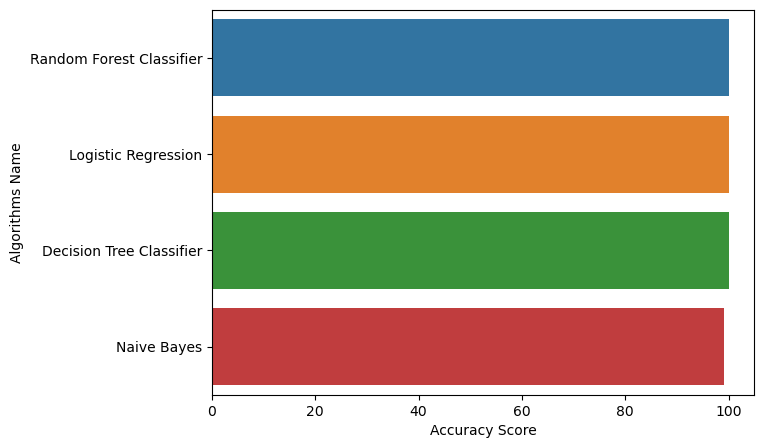

In [79]:
model_list = [['Random Forest Classifier', rfc_accuracy], ['Logistic Regression', lm_log_accuracy],
        ['Decision Tree Classifier',dectree_accuracy], ['Naive Bayes', MNB_accuracy]]
DataFrame = pd.DataFrame(model_list, columns=['Algorithms Name', 'Accuracy Score'])
plt.figure(figsize=(7,5))
sns.barplot(x='Accuracy Score', y='Algorithms Name', data = DataFrame)
plt.show()